# Lab: using clustering to find best store locations

Imagine the following situation:<br>
You own a pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude, Longitude)*. You do not have any stores in this neighborhood, and driving there each time is too expensive (especially with current gas prices). So you decide to open $K$ new stores in this area. The task is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and otput the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distance between the store and each delivery address? __Explain your idea in a separate cell below.__

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np
import random
from math import sqrt
from sklearn.cluster import KMeans


The data is a real data collected by [this person](https://github.com/angelddaz) while they were working as a pizza delivery driver. The file [pizza_delivery_locations.csv](https://drive.google.com/file/d/1tSpqC5sM7DegMil4D9U3DN9exYNATpiA/view?usp=sharing) is a projection of the original data and contains only *(Latitude, Longitude)* of each delivery address. Download the file and update the path below.

In [1]:
import os
for list_of_files in os.listdir("../data_sets"):
	print(list_of_files)

contact_lenses.csv
covid_categorical_good.csv
housing.csv
pizza_delivery_locations.csv
StudentEvaluations.csv
titanic.csv
two_houses.csv


In [33]:
data_file = "../data_sets/pizza_delivery_locations.csv"

In [34]:
data = pd.read_csv(data_file)
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()

Index(['Latitude', 'Longitude'], dtype='object')


In [35]:
data.shape

(1301, 2)

In [42]:
print(data)

[[  43.666573 -116.263356]
 [  43.652722 -116.259743]
 [  43.624462 -116.21835 ]
 ...
 [  43.652722 -116.259743]
 [  43.648076 -116.23413 ]
 [  43.659428 -116.231891]]


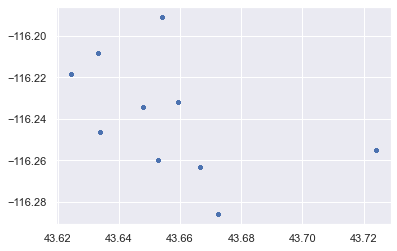

In [36]:
plt.plot(data[:,0], data[:,1], '.')

## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can use the `sklearn.KMeans` module to perform clustering.

In [37]:
# clustering code for 2,3 and 4 clusters
K = 2
kmeans = KMeans(n_clusters=K)
kmeans.fit(data)

KMeans(n_clusters=2)

In [38]:
# Extracting best store locations for each cluster of addresses
kmeans.cluster_centers_

array([[  43.63727286, -116.22524745],
       [  43.66816551, -116.2660482 ]])

## Task 2
Visualize clusters by plotting each data point and coloring it with a different color corresponding to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

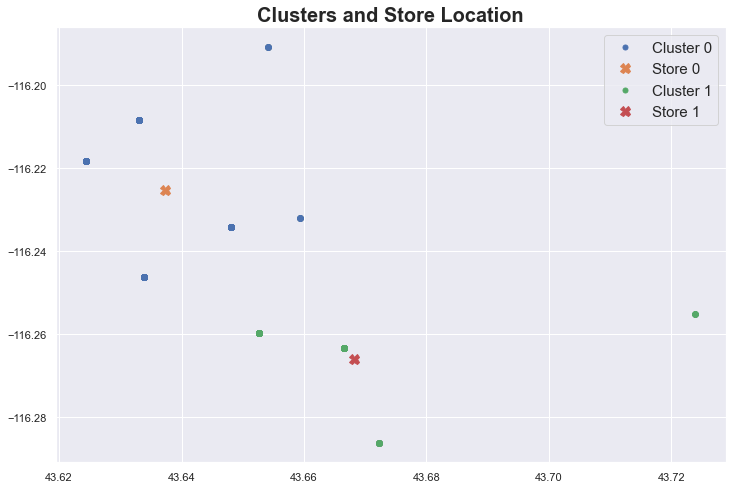

In [39]:
labels = kmeans.labels_
plt.figure(figsize=(12,8))
plt.title("Clusters and Store Location", size = 20, weight = 'bold')
for i in range(K):
    plt.plot(data[labels == i,0], data[labels == i,1], '.', label=f'Cluster {i}',markersize=10)
    plt.plot(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 'X', label=f'Store {i}', markersize=10)
plt.legend(fontsize=15)


## Answer:

We chose the location of the store to be the centroid for each cluster because the centroid of each cluster gives us the minimum distance to all points within the cluster.

## Examples of cluster visualization in 2D

Plotting original data:
    
<img src="clusters.png">

Plotting clusters with store locations
<img src="locations.png">

Copyright &copy; 2022 Marina Barsky. All rights reserved.